#### Import the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the dataset

In [3]:
df = pd.read_csv('HeartDisease.csv')
df.head() # top 5 rows

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Shape

In [4]:
df.shape
# rows= 303,cols =14

(303, 14)

### Data Preprocessing

#### 1) Handling Null values

In [5]:
df.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

#### Inference
1) There are no null values.

#### 2) Handle the dupliactes

In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [8]:
df.shape

(302, 14)

#### 3) Check the data types

In [9]:
df.dtypes

age                      int64
gender                   int64
chest_pain               int64
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar      int64
rest_ecg                 int64
thalach                  int64
exer_angina              int64
old_peak               float64
slope                    int64
ca                       int64
thalassemia              int64
target                   int64
dtype: object

#### Check the Target variable

In [10]:
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

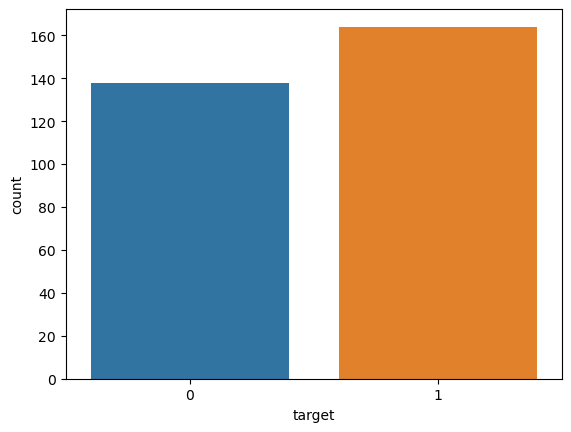

In [11]:
sns.countplot(x=df['target'])
plt.show()

#### EDA

In [12]:
print(df.columns)
df.head(3)

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')


,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [13]:
for i in df.columns[[1,2,5,6,8,10,11,12]]:
    print(f'Feature: {i}')
    print(df[i].value_counts())
    print('*'*20)

Feature: gender
1    206
0     96
Name: gender, dtype: int64
********************
Feature: chest_pain
0    143
2     86
1     50
3     23
Name: chest_pain, dtype: int64
********************
Feature: fasting_blood_sugar
0    257
1     45
Name: fasting_blood_sugar, dtype: int64
********************
Feature: rest_ecg
1    151
0    147
2      4
Name: rest_ecg, dtype: int64
********************
Feature: exer_angina
0    203
1     99
Name: exer_angina, dtype: int64
********************
Feature: slope
2    141
1    140
0     21
Name: slope, dtype: int64
********************
Feature: ca
0    175
1     65
2     38
3     20
4      4
Name: ca, dtype: int64
********************
Feature: thalassemia
2    165
3    117
1     18
0      2
Name: thalassemia, dtype: int64
********************


### Bivariate Analysis

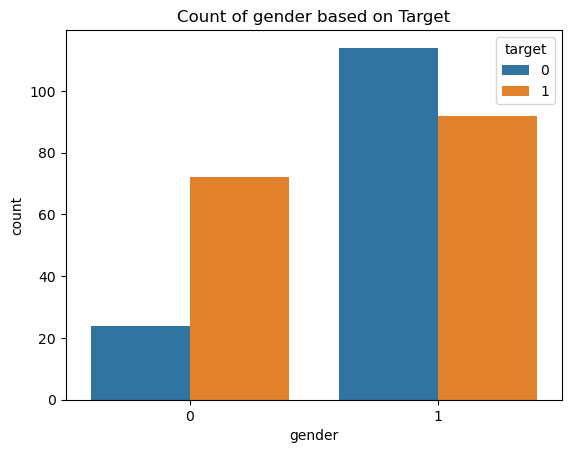

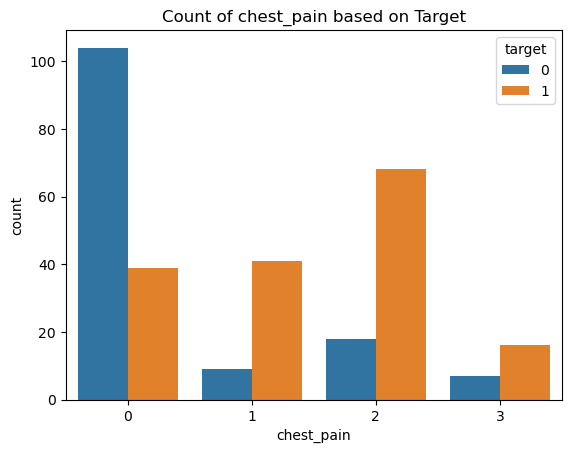

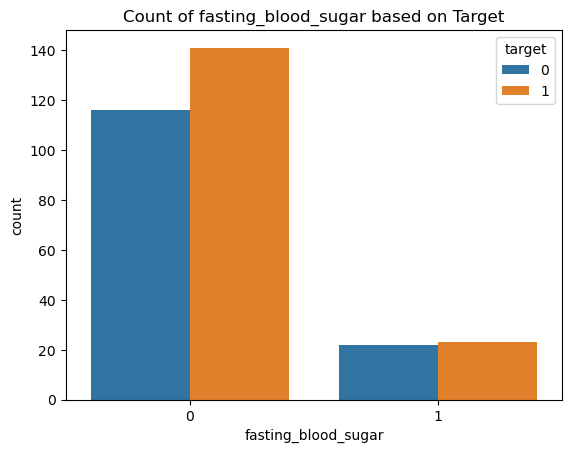

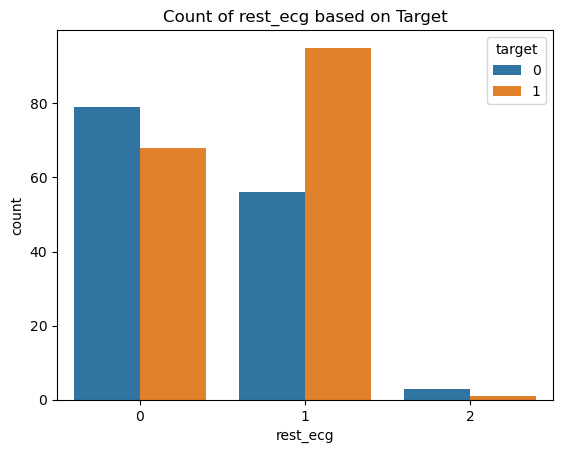

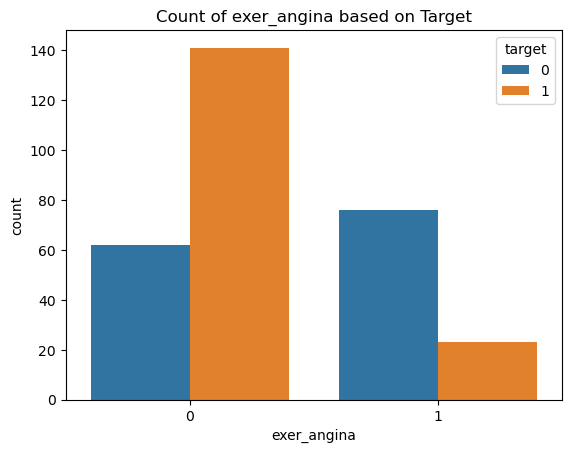

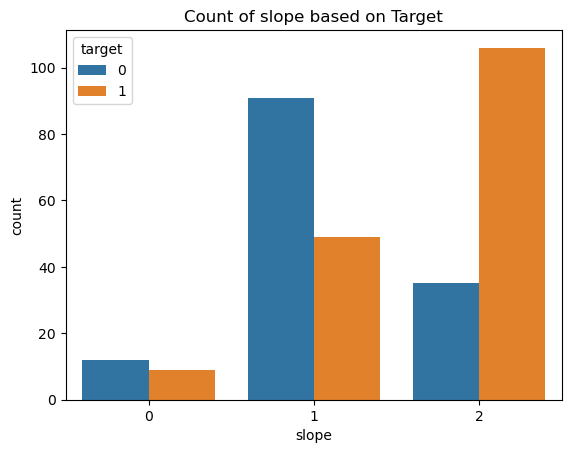

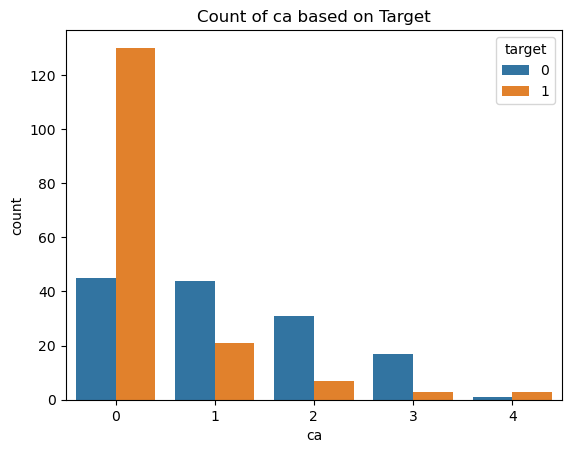

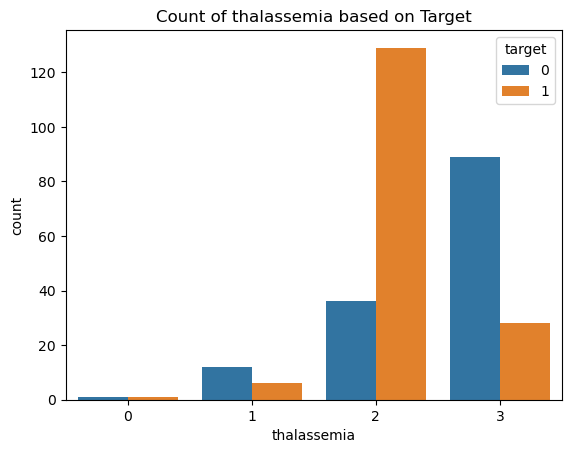

In [14]:
for i in df.columns[[1,2,5,6,8,10,11,12]]:
    sns.countplot(x=df[i],hue=df['target'])
    plt.title(f'Count of {i} based on Target')
    plt.show()

In [15]:
print(df.columns)
df.head(2)

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')


,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


### Correlation

In [16]:
df.shape

(302, 14)

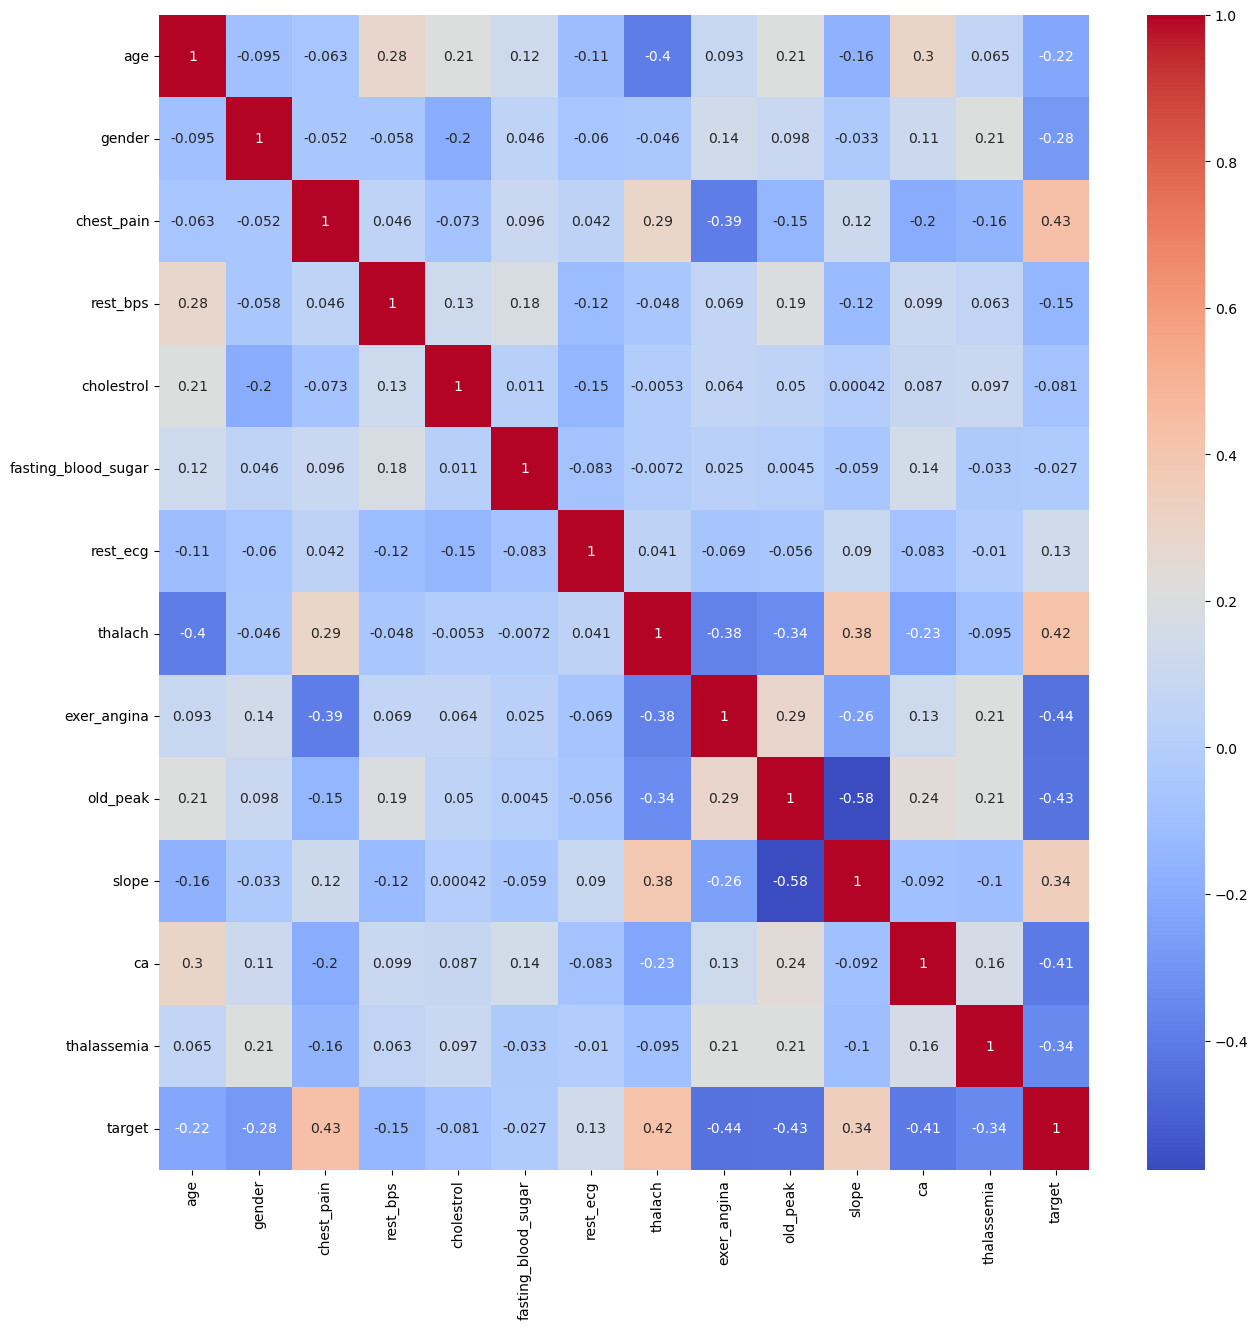

In [17]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

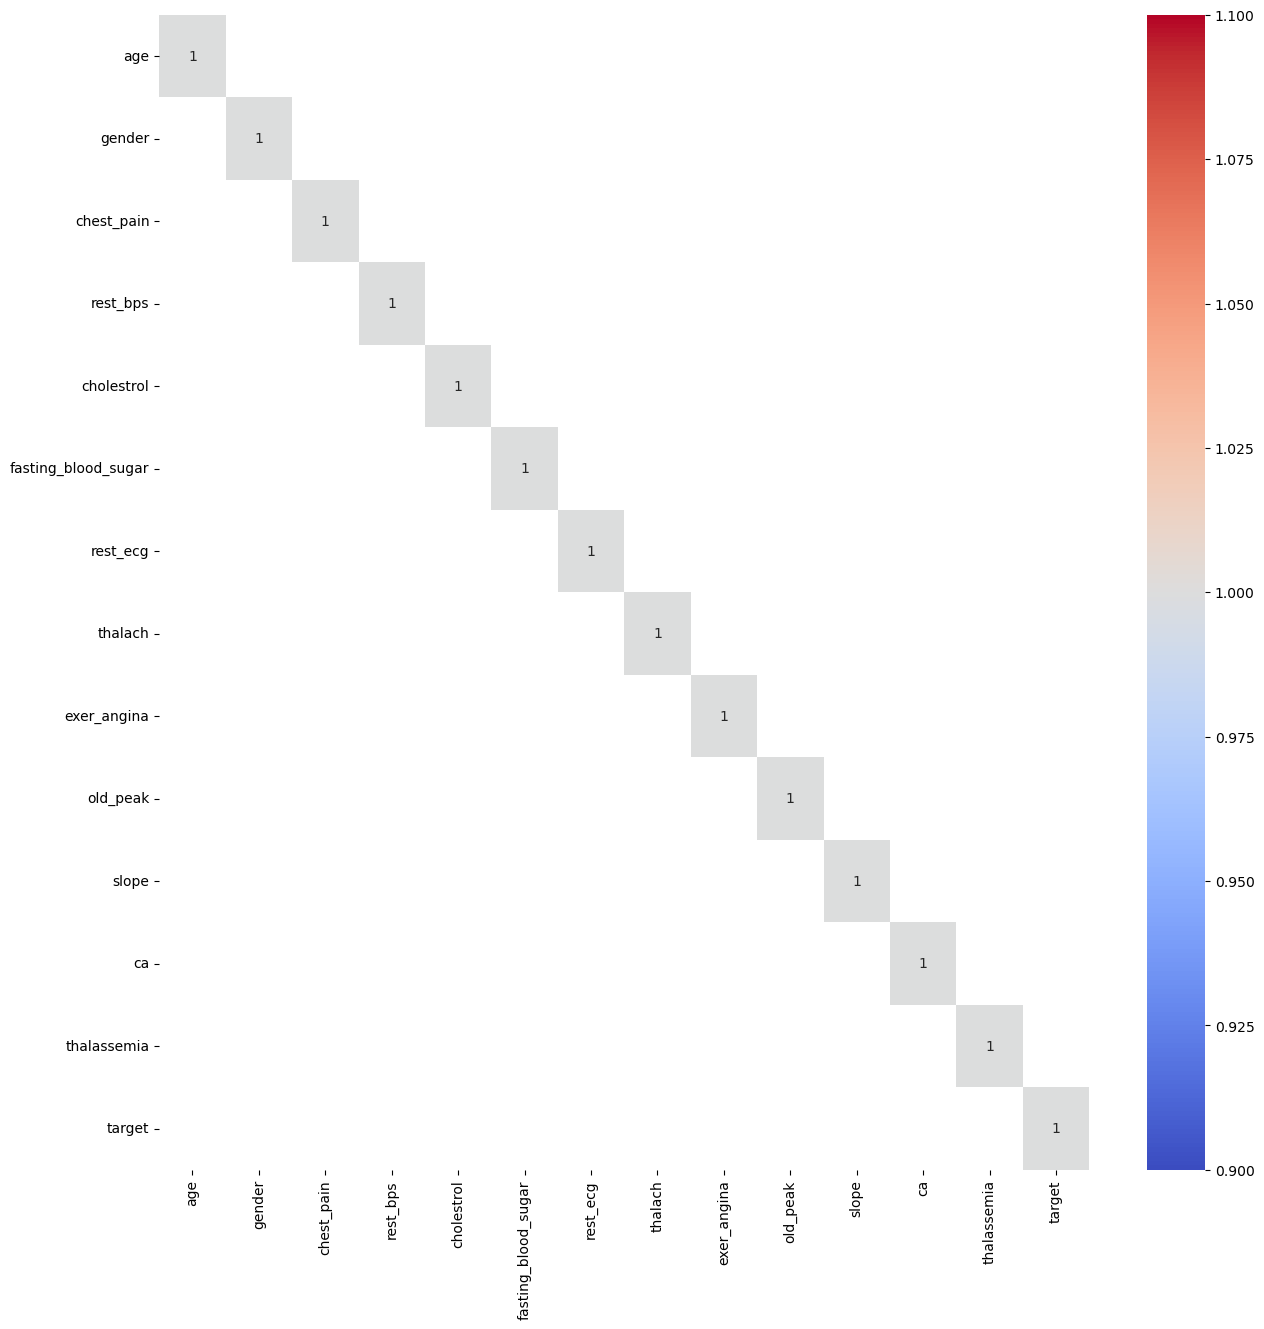

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(corr[abs(corr)>0.7],annot=True,cmap='coolwarm') # 'RdBu'
plt.show()

#### Inference
1) There are no highly correlated features

#### Continuous Columns

In [19]:
continuous_cols = ['age','rest_bps','cholestrol','thalach','old_peak']

In [20]:
df[continuous_cols].head()

,age,rest_bps,cholestrol,thalach,old_peak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [21]:
# df["old_peak"].value_counts()

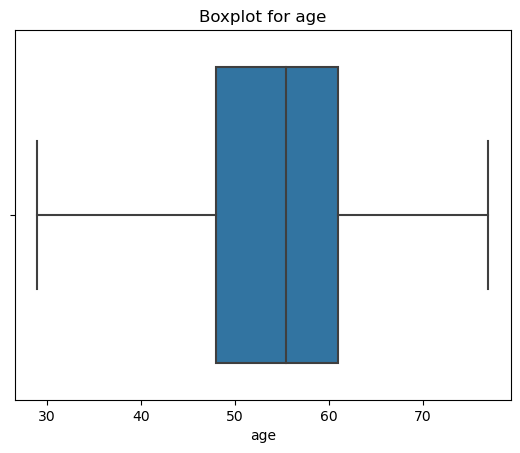

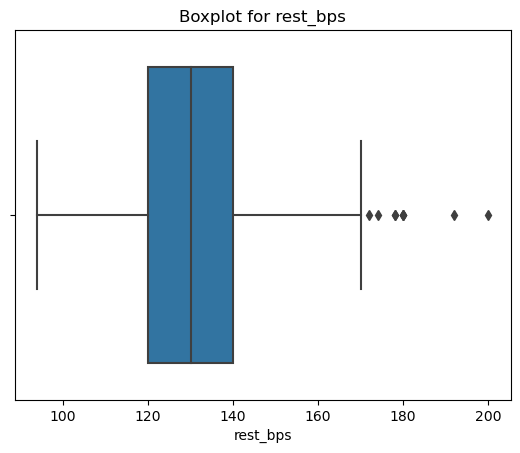

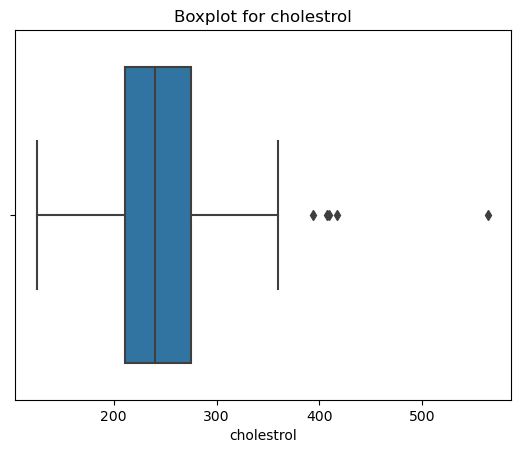

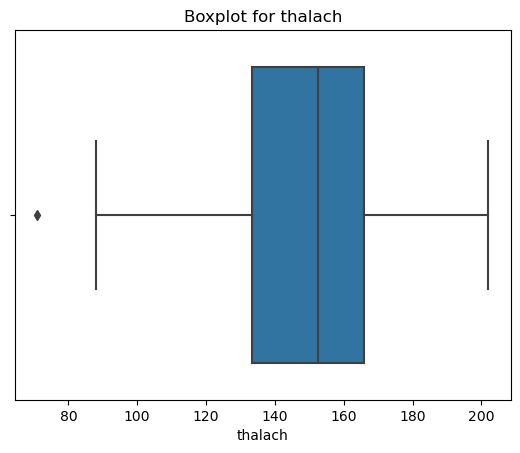

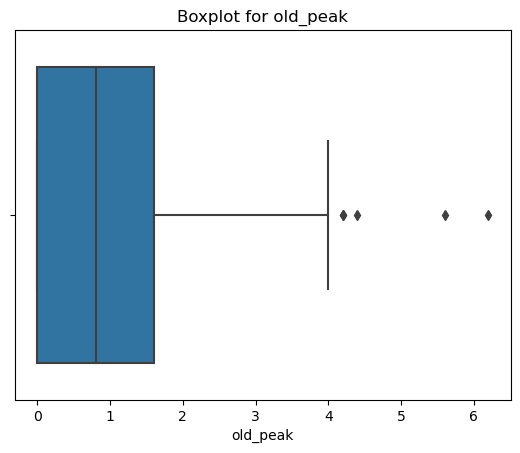

In [22]:
for i in continuous_cols:
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

In [23]:
df[continuous_cols].describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
age,302.0,54.420530,9.047970,29.0,35.00,35.04,38.00,40.00,55.5,68.00,69.97,70.00,71.00,77.0
rest_bps,302.0,131.602649,17.563394,94.0,100.00,101.02,104.03,108.00,130.0,160.00,170.00,177.92,180.00,200.0
cholestrol,302.0,246.500000,51.753489,126.0,149.00,160.08,167.03,175.05,240.5,326.95,340.97,353.98,406.87,564.0
thalach,302.0,149.569536,22.903527,71.0,95.01,97.04,103.06,108.05,152.5,181.95,184.97,186.98,191.98,202.0
old_peak,302.0,1.043046,1.161452,0.0,0.00,0.00,0.00,0.00,0.8,3.40,3.60,4.00,4.20,6.2


In [24]:
print(df[df['thalach']<97.01].shape)
print(df[df['old_peak']>4.0].shape)
print(df[df['cholestrol']>353.98].shape)
print(df[df['rest_bps']>170.00].shape)

(7, 14)
(5, 14)
(7, 14)
(9, 14)


#### Outlier Treament

In [25]:
def outlier_treatment(x):
    x = x.clip(upper=x.quantile(0.97))
    x = x.clip(lower=x.quantile(0.02))
    return x

In [26]:
df1 = df.copy()

In [27]:
outlier_cols = ['rest_bps','cholestrol','thalach','old_peak']

In [28]:
df[outlier_cols] = df[outlier_cols].apply(outlier_treatment)

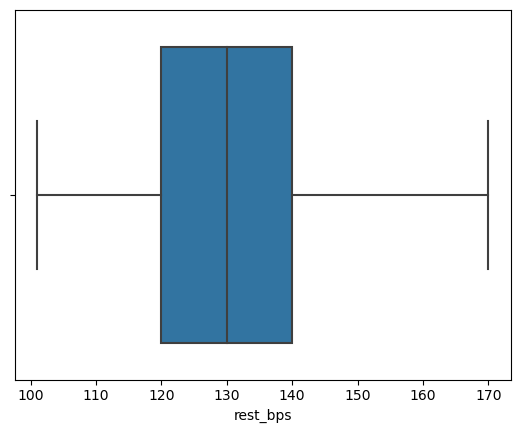

In [29]:
sns.boxplot(x=df['rest_bps'])
plt.show()

In [30]:
# print(df[df['rest_bps']>170.00].shape)
# df['rest_bps'][df['rest_bps']>170.00].head()

In [31]:
df[continuous_cols].describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
age,302.0,54.420530,9.047970,29.00,35.00,35.0400,38.00,40.00,55.5,68.00,69.9700,70.00,71.00,77.00
rest_bps,302.0,131.318344,16.484665,101.02,101.02,101.0396,104.03,108.00,130.0,160.00,170.0000,170.00,170.00,170.00
cholestrol,302.0,245.096887,45.238733,160.08,160.08,160.1584,167.03,175.05,240.5,326.95,340.9409,340.97,340.97,340.97
thalach,302.0,149.539669,22.154722,97.04,97.04,97.0792,103.06,108.05,152.5,181.95,184.9409,184.97,184.97,184.97
old_peak,302.0,1.016556,1.081830,0.00,0.00,0.0000,0.00,0.00,0.8,3.40,3.6000,3.60,3.60,3.60


### Select dependent and Independnet Features

In [32]:
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145.0,233.00,1,0,150.00,0,2.3,0,0,1,1
1,37,1,2,130.0,250.00,0,1,184.97,0,3.5,0,0,2,1
2,41,0,1,130.0,204.00,0,0,172.00,0,1.4,2,0,2,1
3,56,1,1,120.0,236.00,0,1,178.00,0,0.8,2,0,2,1
4,57,0,0,120.0,340.97,0,1,163.00,1,0.6,2,0,2,1


In [34]:
x = df.drop('target',axis=1)   # independent features
y = df['target']               # dependent feature
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(302, 13)
(302,)


#### Split the data into train and test

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(211, 13)
(91, 13)
(211,)
(91,)


#### Craete Function to compute Confusion Matrix, Classification Report

In [37]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [39]:
def eval_model(y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

In [52]:
def model_metrics(model,x_train,x_test,y_train,y_test):  # model = instance of model
    model.fit(x_train,y_train)
    train_scr = model.score(x_train,y_train)
    test_scr = model.score(x_test,y_test)
    print('Training score',train_scr)
    print('Testing score',test_scr)
    ypred = model.predict(x_test)
    print('Predictions\n',ypred)
    eval_model(y_test,ypred)
    res = {'Train_Score':train_scr,'Test_Score':test_scr}
    return res
#     cm = confusion_matrix(y_test,ypred)
#     print(cm)
#     print(classification_report(y_test,ypred))

#### Applying The Models

### Model - 1

In [53]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

In [54]:
dt1 = DecisionTreeClassifier(random_state=20)  # criterion='gini'
dt1_res = model_metrics(dt1,x_train,x_test,y_train,y_test)
# Highly Overfit Model

Training score 1.0
Testing score 0.8241758241758241
Predictions
 [0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1
 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1]
Confusion Matrix
 [[35  7]
 [ 9 40]]
Classification Report
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        42
           1       0.85      0.82      0.83        49

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



In [55]:
print(dt1_res)

{'Train_Score': 1.0, 'Test_Score': 0.8241758241758241}


In [59]:
base_model = pd.DataFrame(dt1_res,index=['DT(Base Model)'])
base_model

,Train_Score,Test_Score
DT(Base Model),1.0,0.824176


In [43]:
fn = x_train.columns
cn = ['0','1']

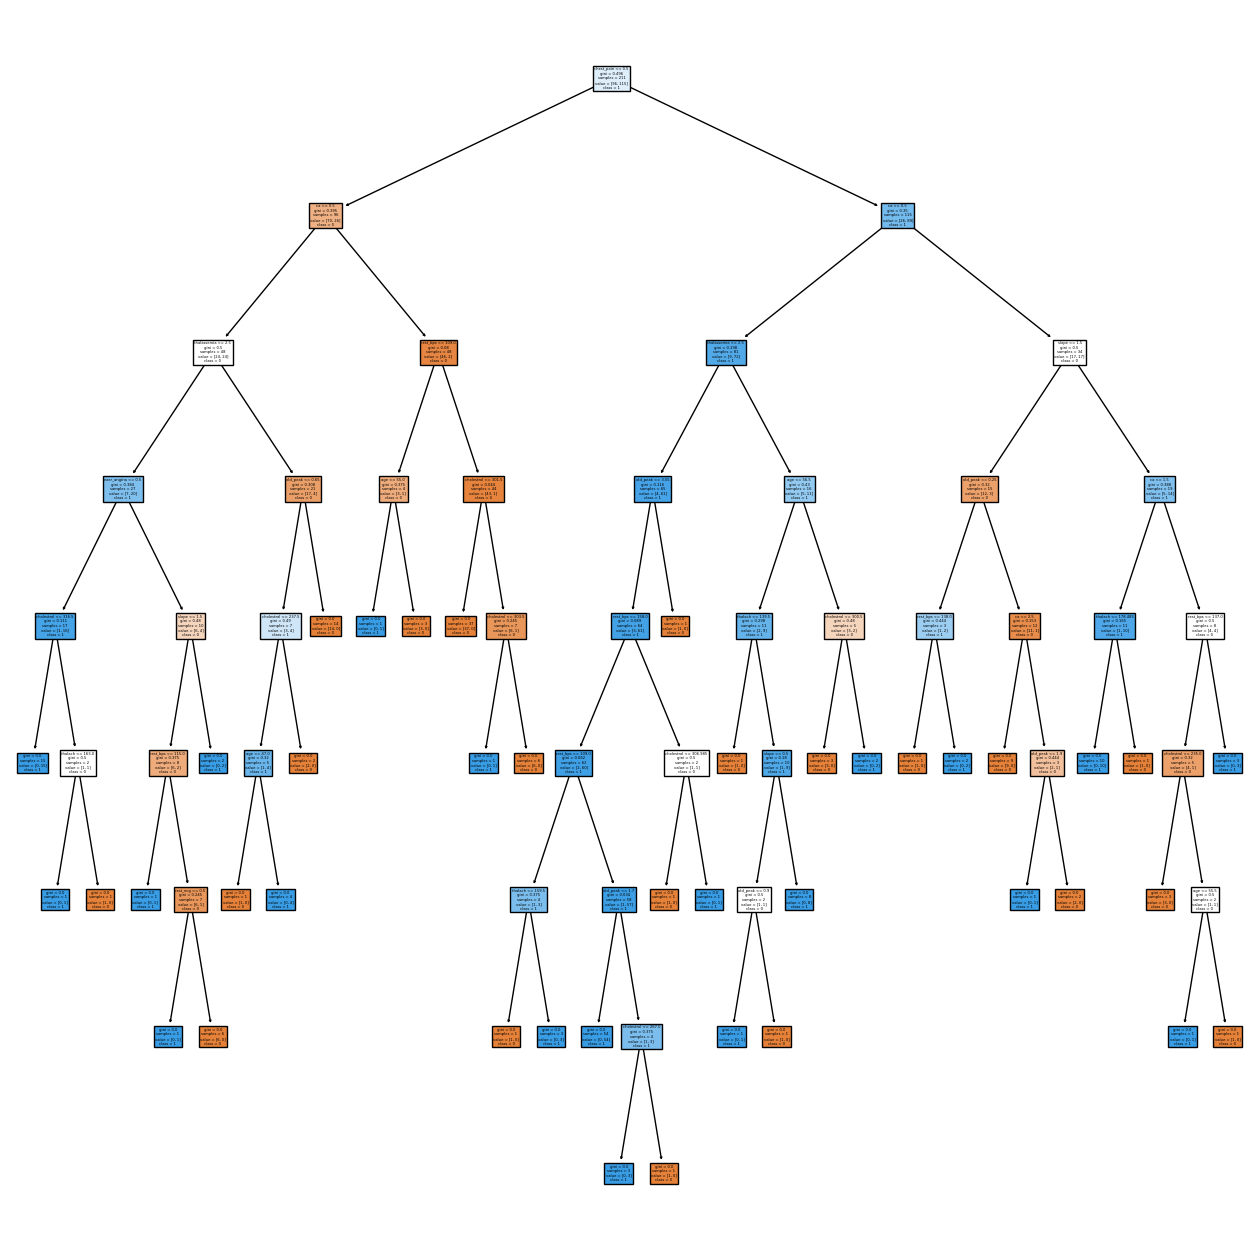

In [44]:
plt.figure(figsize=(16,16))
plot_tree(dt1,feature_names=fn,class_names=cn,filled=True)
plt.show()

In [45]:
export_text(dt1,feature_names=x_train.columns.tolist())

'|--- chest_pain <= 0.50\n|   |--- ca <= 0.50\n|   |   |--- thalassemia <= 2.50\n|   |   |   |--- exer_angina <= 0.50\n|   |   |   |   |--- cholestrol <= 316.50\n|   |   |   |   |   |--- class: 1\n|   |   |   |   |--- cholestrol >  316.50\n|   |   |   |   |   |--- thalach <= 163.00\n|   |   |   |   |   |   |--- class: 1\n|   |   |   |   |   |--- thalach >  163.00\n|   |   |   |   |   |   |--- class: 0\n|   |   |   |--- exer_angina >  0.50\n|   |   |   |   |--- slope <= 1.50\n|   |   |   |   |   |--- rest_bps <= 115.00\n|   |   |   |   |   |   |--- class: 1\n|   |   |   |   |   |--- rest_bps >  115.00\n|   |   |   |   |   |   |--- rest_ecg <= 0.50\n|   |   |   |   |   |   |   |--- class: 1\n|   |   |   |   |   |   |--- rest_ecg >  0.50\n|   |   |   |   |   |   |   |--- class: 0\n|   |   |   |   |--- slope >  1.50\n|   |   |   |   |   |--- class: 1\n|   |   |--- thalassemia >  2.50\n|   |   |   |--- old_peak <= 0.65\n|   |   |   |   |--- cholestrol <= 237.50\n|   |   |   |   |   |--- age

### Model - 2
With Pruning

In [60]:
dt2 = DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_split=20)
dt2_res = model_metrics(dt2,x_train,x_test,y_train,y_test)

Training score 0.8767772511848341
Testing score 0.8021978021978022
Predictions
 [0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1
 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1]
Confusion Matrix
 [[33  9]
 [ 9 40]]
Classification Report
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        42
           1       0.82      0.82      0.82        49

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



In [63]:
model2 = pd.DataFrame(dt2_res,index=['DT(gini with Pruning)'])
model2

,Train_Score,Test_Score
DT(gini with Pruning),0.876777,0.802198


In [64]:
fn = x_train.columns
cn = ['0','1']

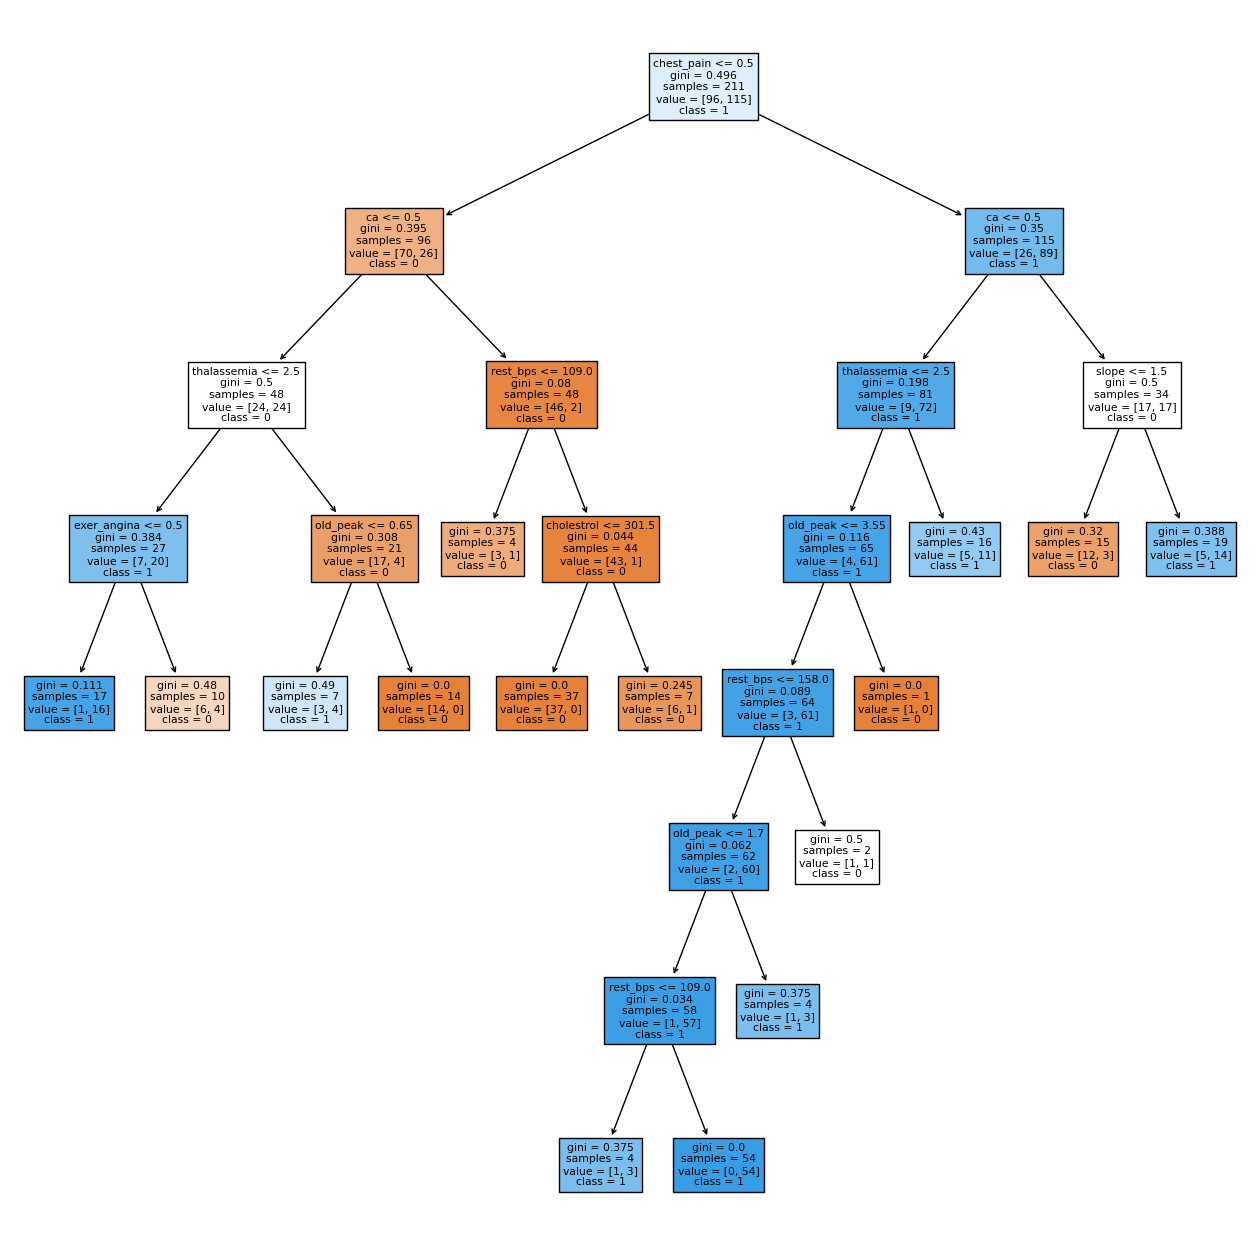

In [65]:
plt.figure(figsize=(16,16))
plot_tree(dt2,feature_names=fn,class_names=cn,filled=True)
plt.show()

### Model - 3

In [67]:
dt3 = DecisionTreeClassifier(criterion='entropy',max_depth=6,min_samples_split=25)
dt3_res = model_metrics(dt3,x_train,x_test,y_train,y_test)

Training score 0.8862559241706162
Testing score 0.8131868131868132
Predictions
 [0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1
 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1]
Confusion Matrix
 [[38  4]
 [13 36]]
Classification Report
               precision    recall  f1-score   support

           0       0.75      0.90      0.82        42
           1       0.90      0.73      0.81        49

    accuracy                           0.81        91
   macro avg       0.82      0.82      0.81        91
weighted avg       0.83      0.81      0.81        91



In [72]:
model3 = pd.DataFrame(dt3_res,index=['DT(entropy with Pruning)'])
model3

,Train_Score,Test_Score
DT(entropy with Pruning),0.886256,0.813187


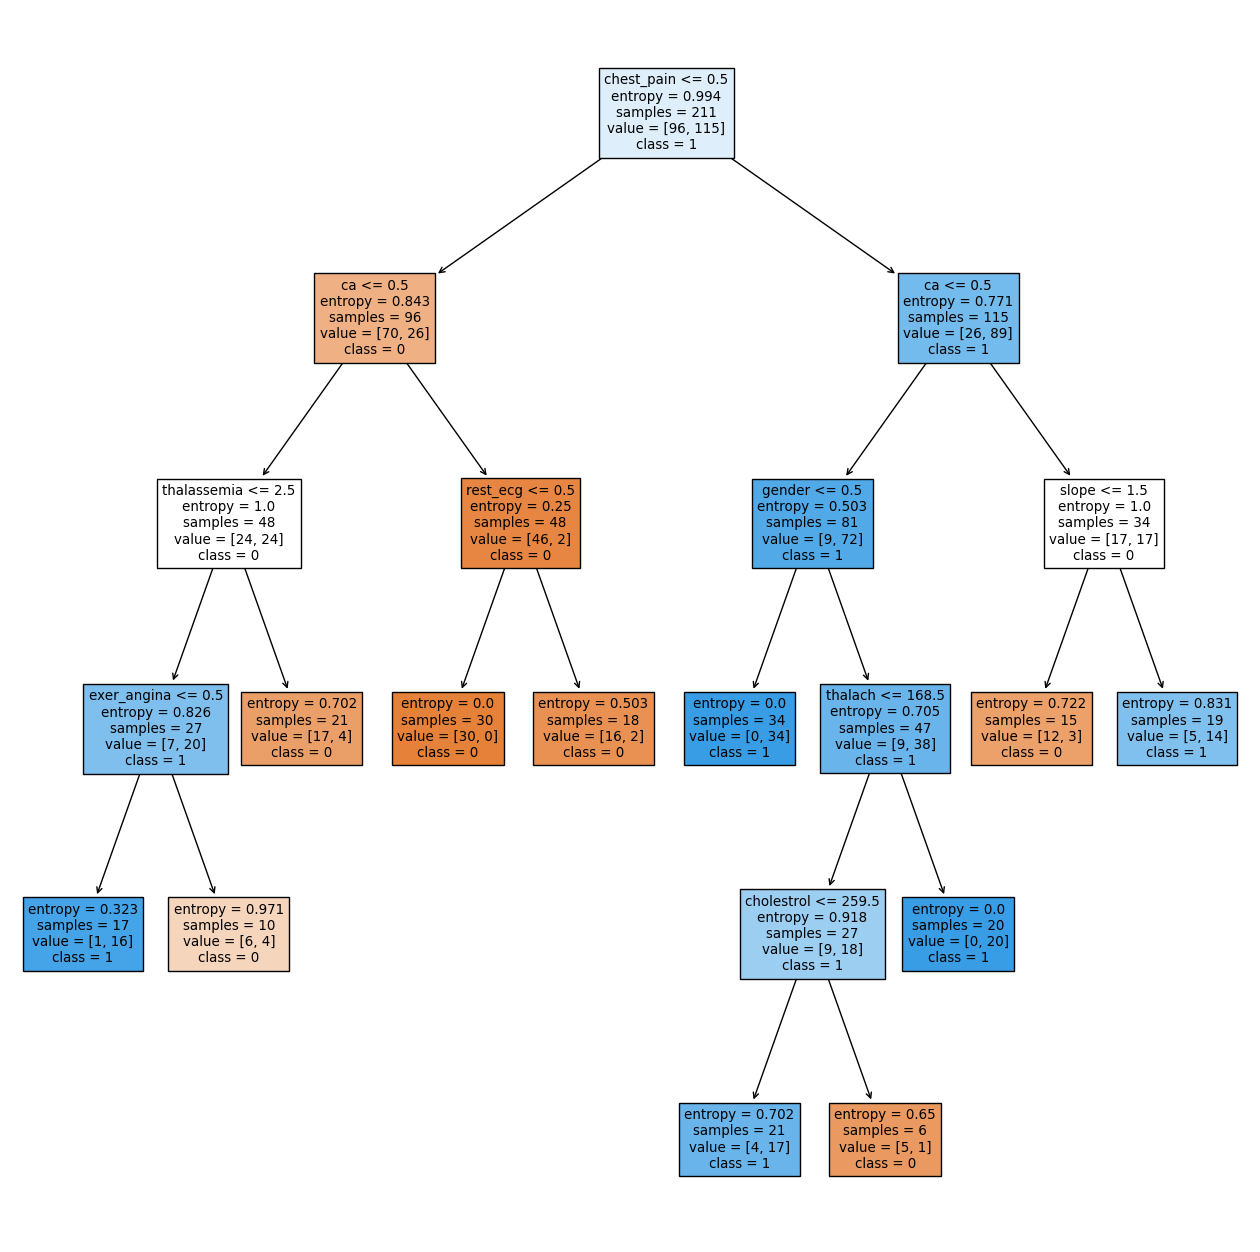

In [69]:
plt.figure(figsize=(16,16))
plot_tree(dt3,feature_names=fn,class_names=cn,filled=True)
plt.show()

#### Logistic Reg

In [74]:
from sklearn.linear_model import LogisticRegression

In [76]:
lr1 = LogisticRegression(max_iter=1000)
lr1_res = model_metrics(lr1,x_train,x_test,y_train,y_test)

Training score 0.8767772511848341
Testing score 0.8351648351648352
Predictions
 [0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1
 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1]
Confusion Matrix
 [[34  8]
 [ 7 42]]
Classification Report
               precision    recall  f1-score   support

           0       0.83      0.81      0.82        42
           1       0.84      0.86      0.85        49

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



In [77]:
model4 = pd.DataFrame(lr1_res,index=['Log_Reg'])
model4

,Train_Score,Test_Score
Log_Reg,0.876777,0.835165


#### Combining all Results

In [78]:
res = pd.concat([base_model,model2,model3,model4])
res

,Train_Score,Test_Score
DT(Base Model),1.000000,0.824176
DT(gini with Pruning),0.876777,0.802198
DT(entropy with Pruning),0.886256,0.813187
Log_Reg,0.876777,0.835165


### Cross Validation

In [79]:
from sklearn.model_selection import cross_val_score,KFold

#### CV for Max Depth

In [80]:
# md = max_depth
md = [4,5,6,7,8,9]
kf = KFold(n_splits=7)
for i in md:
    scores = cross_val_score(DecisionTreeClassifier(max_depth=i),x_train,y_train,
                             cv=kf,scoring='accuracy')
    print(f'Scores at max_depth {i} is {scores}')
    print(f'Avg _Score at max_depth {i} is {scores.mean()}')

Scores at max_depth 4 is [0.83870968 0.66666667 0.76666667 0.73333333 0.7        0.8
 0.73333333]
Avg _Score at max_depth 4 is 0.7483870967741935
Scores at max_depth 5 is [0.83870968 0.63333333 0.8        0.73333333 0.73333333 0.7
 0.73333333]
Avg _Score at max_depth 5 is 0.7388632872503841
Scores at max_depth 6 is [0.83870968 0.63333333 0.83333333 0.6        0.7        0.73333333
 0.7       ]
Avg _Score at max_depth 6 is 0.719815668202765
Scores at max_depth 7 is [0.87096774 0.7        0.76666667 0.66666667 0.66666667 0.66666667
 0.66666667]
Avg _Score at max_depth 7 is 0.714900153609831
Scores at max_depth 8 is [0.83870968 0.7        0.8        0.66666667 0.7        0.7
 0.63333333]
Avg _Score at max_depth 8 is 0.719815668202765
Scores at max_depth 9 is [0.80645161 0.66666667 0.83333333 0.63333333 0.7        0.66666667
 0.63333333]
Avg _Score at max_depth 9 is 0.7056835637480798


#### CV for min_samples_split

In [82]:
# mss = min_samples_split
mss = [10,12,14,17,20,22]
kf = KFold(n_splits=7)
for i in mss:
    scores = cross_val_score(DecisionTreeClassifier(min_samples_split=i),x_train,y_train,
                             cv=kf,scoring='accuracy')
    print(f'Scores at max_depth {i} is {scores}')
    print(f'Avg _Score at max_depth {i} is {scores.mean()}')

Scores at max_depth 10 is [0.77419355 0.7        0.76666667 0.7        0.7        0.73333333
 0.73333333]
Avg _Score at max_depth 10 is 0.7296466973886329
Scores at max_depth 12 is [0.83870968 0.7        0.76666667 0.7        0.73333333 0.73333333
 0.73333333]
Avg _Score at max_depth 12 is 0.7436251920122887
Scores at max_depth 14 is [0.83870968 0.7        0.8        0.73333333 0.73333333 0.66666667
 0.73333333]
Avg _Score at max_depth 14 is 0.7436251920122888
Scores at max_depth 17 is [0.83870968 0.7        0.8        0.73333333 0.66666667 0.66666667
 0.76666667]
Avg _Score at max_depth 17 is 0.738863287250384
Scores at max_depth 20 is [0.87096774 0.7        0.76666667 0.73333333 0.66666667 0.8
 0.76666667]
Avg _Score at max_depth 20 is 0.7577572964669738
Scores at max_depth 22 is [0.87096774 0.7        0.83333333 0.76666667 0.7        0.8
 0.76666667]
Avg _Score at max_depth 22 is 0.776804915514593


#### CV for Max_Deth and Min_Samples_Split

In [84]:
# md = max_depth
# mss = min_samples_split
# criterion = ['gini','entropy']
md = [4,5,6,7,8,9]
mss = [10,12,14,17,20,22,25]
kf = KFold(n_splits=7)
for i in md:
    for j in mss:
        scores = cross_val_score(DecisionTreeClassifier(max_depth=i,min_samples_split=j),
                                 x_train,y_train,cv=kf,scoring='accuracy')
        print(f'Avg _Score at max_depth {i} and min_samples_split {j} is {scores.mean()}')

Avg _Score at max_depth 4 and min_samples_split 10 is 0.7579109062980031
Avg _Score at max_depth 4 and min_samples_split 12 is 0.7579109062980031
Avg _Score at max_depth 4 and min_samples_split 14 is 0.7626728110599078
Avg _Score at max_depth 4 and min_samples_split 17 is 0.7579109062980031
Avg _Score at max_depth 4 and min_samples_split 20 is 0.7577572964669738
Avg _Score at max_depth 4 and min_samples_split 22 is 0.776804915514593
Avg _Score at max_depth 4 and min_samples_split 25 is 0.7482334869431643
Avg _Score at max_depth 5 and min_samples_split 10 is 0.7248847926267281
Avg _Score at max_depth 5 and min_samples_split 12 is 0.7436251920122888
Avg _Score at max_depth 5 and min_samples_split 14 is 0.738863287250384
Avg _Score at max_depth 5 and min_samples_split 17 is 0.7341013824884792
Avg _Score at max_depth 5 and min_samples_split 20 is 0.7577572964669738
Avg _Score at max_depth 5 and min_samples_split 22 is 0.776804915514593
Avg _Score at max_depth 5 and min_samples_split 25 is 

### HyperParameter Tuning Using GridSearchCV

In [86]:
from sklearn.model_selection import GridSearchCV

In [93]:
x_train.shape

(211, 13)

In [89]:
hparams_dt = {'criterion':['gini','entropy'],
             'max_depth':list(range(4,12)),
             'min_samples_split':[8,10,12,14,15,17,20,22,24]}

In [90]:
bmodel = DecisionTreeClassifier()
kf = KFold(n_splits=5)
gs1 = GridSearchCV(estimator=bmodel,param_grid=hparams_dt,cv=kf, scoring='accuracy') 
gs1.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11],
                         'min_samples_split': [8, 10, 12, 14, 15, 17, 20, 22,
                                               24]},
             scoring='accuracy')

In [91]:
print('Best Hyperparamters')
print(gs1.best_params_)
print(gs1.best_estimator_)

Best Hyperparamters
{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}
DecisionTreeClassifier(max_depth=5, min_samples_split=10)


In [101]:
gs_res = pd.DataFrame(gs1.cv_results_)
print(gs_res.shape)
gs_res.head(3)

(144, 16)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004197,0.001165,0.002599,0.000491,gini,4,8,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.790698,0.714286,0.738095,0.809524,0.785714,0.767663,0.035587,47
1,0.004998,0.000894,0.003997,0.001548,gini,4,10,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.790698,0.714286,0.738095,0.809524,0.785714,0.767663,0.035587,47
2,0.004597,0.001355,0.003002,0.000632,gini,4,12,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.790698,0.738095,0.738095,0.809524,0.785714,0.772425,0.029134,5


In [102]:
gs_res.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_min_samples_split',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [103]:
r1 = gs_res[['param_criterion', 'param_max_depth', 'param_min_samples_split','mean_test_score']]
r1.head()

,param_criterion,param_max_depth,param_min_samples_split,mean_test_score
0,gini,4,8,0.767663
1,gini,4,10,0.767663
2,gini,4,12,0.772425
3,gini,4,14,0.772425
4,gini,4,15,0.772425


In [104]:
r1[r1['mean_test_score']==r1['mean_test_score'].max()]

,param_criterion,param_max_depth,param_min_samples_split,mean_test_score
10,gini,5,10,0.781949


In [94]:
print('Train Score',gs1.score(x_train,y_train))
print('Test Score',gs1.score(x_test,y_test))

Train Score 0.9004739336492891
Test Score 0.7692307692307693


In [96]:
gs_based_model = DecisionTreeClassifier(**gs1.best_params_)
gs_based_res = model_metrics(gs_based_model,x_train,x_test,y_train,y_test)

Training score 0.9004739336492891
Testing score 0.7692307692307693
Predictions
 [0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1
 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1
 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1]
Confusion Matrix
 [[34  8]
 [13 36]]
Classification Report
               precision    recall  f1-score   support

           0       0.72      0.81      0.76        42
           1       0.82      0.73      0.77        49

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



In [97]:
gs_model = pd.DataFrame(gs_based_res,index=['GridSearchCV with DT'])
gs_model

,Train_Score,Test_Score
GridSearchCV with DT,0.900474,0.769231


In [99]:
res = pd.concat([res,gs_model])
res

,Train_Score,Test_Score
DT(Base Model),1.000000,0.824176
DT(gini with Pruning),0.876777,0.802198
DT(entropy with Pruning),0.886256,0.813187
Log_Reg,0.876777,0.835165
GridSearchCV with DT,0.900474,0.769231


### Hyperparameter Tuning with RandomizedSearchCV

In [105]:
from sklearn.model_selection import RandomizedSearchCV

In [106]:
print(hparams_dt)

{'criterion': ['gini', 'entropy'], 'max_depth': [4, 5, 6, 7, 8, 9, 10, 11], 'min_samples_split': [8, 10, 12, 14, 15, 17, 20, 22, 24]}


In [121]:
bmodel = DecisionTreeClassifier()
kf = KFold(n_splits=5)
rs1 = RandomizedSearchCV(estimator=bmodel,param_distributions=hparams_dt,
                         cv=kf, scoring='accuracy') 
rs1.fit(x_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8, 9, 10, 11],
                                        'min_samples_split': [8, 10, 12, 14, 15,
                                                              17, 20, 22, 24]},
                   scoring='accuracy')

In [122]:
rs_res = pd.DataFrame(rs1.cv_results_)
print(rs_res.shape)

(10, 16)


In [123]:
print('Train Score',rs1.score(x_train,y_train))
print('Test Score',rs1.score(x_test,y_test))
print('Best Hyperparamters')
print(rs1.best_params_)
print(rs1.best_estimator_)

Train Score 0.8767772511848341
Test Score 0.7582417582417582
Best Hyperparamters
{'min_samples_split': 17, 'max_depth': 7, 'criterion': 'gini'}
DecisionTreeClassifier(max_depth=7, min_samples_split=17)


In [124]:
rs_based_model = DecisionTreeClassifier(**rs1.best_params_)
rs_based_res = model_metrics(rs_based_model,x_train,x_test,y_train,y_test)

Training score 0.8767772511848341
Testing score 0.7582417582417582
Predictions
 [0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1
 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1
 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1]
Confusion Matrix
 [[33  9]
 [13 36]]
Classification Report
               precision    recall  f1-score   support

           0       0.72      0.79      0.75        42
           1       0.80      0.73      0.77        49

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91



In [125]:
rs_model = pd.DataFrame(rs_based_res,index=['RandomizedSearchCV with DT'])
rs_model

,Train_Score,Test_Score
RandomizedSearchCV with DT,0.876777,0.758242


In [126]:
res = pd.concat([res,rs_model])
res

,Train_Score,Test_Score
DT(Base Model),1.000000,0.824176
DT(gini with Pruning),0.876777,0.802198
DT(entropy with Pruning),0.886256,0.813187
Log_Reg,0.876777,0.835165
GridSearchCV with DT,0.900474,0.769231
RandomizedSearchCV with DT,0.876777,0.758242
